In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns # for data visualization
import pickle
import datetime
import copy
import statsmodels.api as sm # linear regression 
from statsmodels.stats.proportion import proportions_ztest #proportion z score test
from scipy.special import logit, expit
from scipy.stats import normaltest
# stats.ttest_ind  independent t test
import pingouin as pg
from matplotlib import collections as matcoll
import matplotlib
import ast

## research participation availability 

In [13]:
research_availability = pd.read_excel('research availability_11597hours.xlsx',sheet_name='study_summary_report')
research_availability.columns

Index(['Study name index', 'Study Type', 'Credits', 'Duration', 'Participated',
       'Free Spaces', 'Credits Granted', 'total credit'],
      dtype='object')

In [18]:
np.unique(research_availability['Credits'])

array([0.5, 1. , 1.5, 2. , nan])

research participation opportunities involved a time
commitment of 0.5, 1, 1.5, or 2 hours

In [20]:
len(research_availability[research_availability['Credits']<1.1])/len(research_availability['Credits'])

0.9122807017543859

The vast majority of participation opportunities took 0.5 hours or 1
hour. 

Total research opportunities is 11597 hours, and there are 749 students who had enrolled in Introduction to Psychology course in Spring 2021. So research participation opportunities is an average of 15 hours per student. 

In [33]:
11597/749

15.483311081441922

## total participants in online study

In [2]:
FollowUpStudymatrixDf_finalpaper = pd.read_csv('FollowUpStudymatrixDf_finalpaper.csv')
FollowUpStudymatrixDf_finalpaper.columns

Index(['SUB_INDEX_194', 'age_year', 'gender', 'Total credits',
       'date list KeepSameDate', 'credit list KeepSameDate',
       'date granted list', 'credit list', 'delta progress',
       'cumulative progress', 'AcadeProcFreq_mean',
       'DiscountRate_lnk_multistart_NoRandomResponseFilter',
       'DiscountRate_lnk_multistart_RandomResponseFilterKarolina',
       'RiskAttitude_lnAlpha_multistart1_NoRandomResponseFilter',
       'RiskAttitude_lnAlpha_multistart1_KarolinaFilterpoint4',
       'InterTemporalTask_alwayschoose1or2',
       'InterTemporalTask_failattentioncheckmorethanonce',
       'RiskAttitudeTask_alwayschoose1or2',
       'RiskAttitudeTask_failattentioncheckmorethanonce', 'RiskTakingScore',
       'ImpulsivityScore', 'PerfectionismScore_Hetwitt_SelfOriented',
       'PerfectionismScore_Hetwitt_SocialOriented', 'PerfectionismScore_Frost',
       'SelfControlScore', 'RiskTakingScore_Ethical',
       'RiskTakingScore_Finantial', 'RiskTakingScore_HealthSafety',
       '

all the participates who joined the online study

In [3]:
len(FollowUpStudymatrixDf_finalpaper)

194

the number of participants who completed less than 7 hours of research participation

In [7]:
len(FollowUpStudymatrixDf_finalpaper[FollowUpStudymatrixDf_finalpaper['Total credits']<7])

21

the number of participants who completed more than 7 hours of research participation

In [8]:
len(FollowUpStudymatrixDf_finalpaper)-len(FollowUpStudymatrixDf_finalpaper[FollowUpStudymatrixDf_finalpaper['Total credits']<7])-93

80

## participants met their 7-hour requirement and did not
continue to do more research sessions beyond the requirement

In [14]:
FollowUpStudymatrixDf_7Credit = pd.read_csv('FollowUpStudymatrixDf_finalpaper_loose7Credit.csv')
FollowUpStudymatrixDf_7Credit.columns

Index(['SUB_INDEX_SUBSET_93', 'SUB_INDEX_194', 'age_year', 'gender',
       'Total credits', 'date list KeepSameDate', 'credit list KeepSameDate',
       'date granted list', 'credit list', 'delta progress',
       'cumulative progress', 'AcadeProcFreq_mean', 'DiscountRate_lnk',
       'RiskAttitude_lnAlpha', 'InterTemporalTask_alwayschoose1or2',
       'InterTemporalTask_failattentioncheckmorethanonce',
       'RiskAttitudeTask_alwayschoose1or2',
       'RiskAttitudeTask_failattentioncheckmorethanonce', 'RiskTakingScore',
       'ImpulsivityScore', 'PerfectionismScore_Hetwitt_SelfOriented',
       'PerfectionismScore_Hetwitt_SocialOriented', 'PerfectionismScore_Frost',
       'SelfControlScore', 'RiskTakingScore_Ethical',
       'RiskTakingScore_Finantial', 'RiskTakingScore_HealthSafety',
       'RiskTakingScore_Recreational', 'RiskTakingScore_Social',
       'RiskPerceptionScore', 'RiskPerceptionScore_Ethical',
       'RiskPerceptionScore_Finantial', 'RiskPerceptionScore_HealthSafety

sample size 

In [58]:
len(FollowUpStudymatrixDf_7Credit)

93

### each subject's research times

In [27]:
research_times = []
for ii in range(len(FollowUpStudymatrixDf_7Credit)):
    research_times.append(len(ast.literal_eval(FollowUpStudymatrixDf_7Credit['credit list KeepSameDate'][ii])))

In [29]:
min(research_times)

6

In [31]:
np.median(research_times)

10.0

In [32]:
max(research_times)

12

all students
participated at least 6 times, with a median of 10 times, maximum times is 12.

### indices of procrastination

Mean Unit Completion Day (MUCD)

In [16]:
# since the total credit for some subjects is 7.5 or 8. because the last available participation for
# them to reach 7 will make them have more than 7 credit. For example, 6.5, then they participate for 1 credit, and get 7.5 finally.
# So for mean paragraph completion day. We consider the total credit to be 7. So for the last >0 credit in delta progress,
# we crafted to be the [value - (total credit-7)], then this delta progress we call it DeltaProgForMPCD

MUCD = []
DeltaProgForMPCD = []

for ii in range(len(FollowUpStudymatrixDf_7Credit)): 
    temp = copy.deepcopy(ast.literal_eval(FollowUpStudymatrixDf_7Credit['delta progress'][ii]))
    ls = [i for i, e in enumerate(temp) if e > 0]
    temp[ls[-1]] = temp[ls[-1]]-(FollowUpStudymatrixDf_7Credit['Total credits'][ii]-7)
    DeltaProgForMPCD.append(temp)
    
    tempsum = 0
    for index in range(len(temp)):
        tempsum = tempsum + temp[index]*(index)
    #print(tempsum/7)
    MUCD.append(tempsum/7)

In [17]:
FollowUpStudymatrixDf_7Credit['MUCD'] = MUCD
FollowUpStudymatrixDf_7Credit['DeltaProgForMPCD'] = DeltaProgForMPCD

task completion day

In [18]:
TaskCompletionDay = []

for ii in range(len(FollowUpStudymatrixDf_7Credit)):
#for ii in range(10):    
    temp = ast.literal_eval(FollowUpStudymatrixDf_7Credit['cumulative progress'][ii])
    #print(temp)
    res = next(x for x, val in enumerate(temp)
                                  if val >=7)
    #print(res)
    TaskCompletionDay.append(res)  

In [19]:
FollowUpStudymatrixDf_7Credit['TaskCompletionDay'] = TaskCompletionDay

hours of research participation in the last third of the semester

In [20]:
creditlast5weeks = []
for ii in range(len(FollowUpStudymatrixDf_7Credit)):
    temp = FollowUpStudymatrixDf_7Credit['DeltaProgForMPCD'][ii]
    creditlast5weeks.append(sum(temp[-35:len(temp)]))
        

In [21]:
FollowUpStudymatrixDf_7Credit['creditlast5weeks'] = creditlast5weeks

day of halfway point (median of the time course of work progress)

In [22]:
HalfwayDayofParticipation = np.zeros(len(FollowUpStudymatrixDf_7Credit))
# get the index of the first value above 0.5 in cumulative progress, that is the day
for ii in range(len(FollowUpStudymatrixDf_7Credit)):
    cumproisub = ast.literal_eval(FollowUpStudymatrixDf_7Credit['cumulative progress'][ii])
    jj=0;
    while jj<len(cumproisub):
        if cumproisub[jj]>=3.5:
            HalfwayDayofParticipation[ii] = jj
            break
        jj = jj+1

In [23]:
FollowUpStudymatrixDf_7Credit['HalfwayDayofParticipation'] = HalfwayDayofParticipation

### participation exclusion

Based on pre-registered criteria for delay discounting task, we excluded participants who 

a) failed two or more of the five attention check questions;  

In [34]:
np.sum(~np.isnan(FollowUpStudymatrixDf_7Credit['InterTemporalTask_failattentioncheckmorethanonce']))

3

3 subjects excluded and their index:

In [46]:
nonnan_indices = pd.notnull(FollowUpStudymatrixDf_7Credit['InterTemporalTask_failattentioncheckmorethanonce'])
attention_indices = nonnan_indices.where(nonnan_indices == True).dropna()
attention_indices_list = list(attention_indices.index)
attention_indices_list

[17, 24, 81]

b) consistently chose one option 

In [35]:
np.sum(~np.isnan(FollowUpStudymatrixDf_7Credit['InterTemporalTask_alwayschoose1or2']))

7

7 subjects excluded and their index:

In [47]:
nonnan_indices = pd.notnull(FollowUpStudymatrixDf_7Credit['InterTemporalTask_alwayschoose1or2'])
choseoneoption_indices = nonnan_indices.where(nonnan_indices == True).dropna()
choseoneoption_indices_list = list(choseoneoption_indices.index)
choseoneoption_indices_list

[5, 16, 24, 33, 46, 63, 88]

unique index in a) and b) criteria

In [54]:
unique_excluded_index=list(np.unique(attention_indices_list+choseoneoption_indices_list))
unique_excluded_index

[5, 16, 17, 24, 33, 46, 63, 81, 88]

In [59]:
len(unique_excluded_index)

9

in total there are 9 participants who are excluded based on criteria a) and b)

c) responded randomly
No participant is excluded as a random responder. All 84 subjects passed the quality control test, allowing us to include all of them in our hypothesis testing. 

## final sample (N=84)

### geometric information

In [76]:
final_sample = FollowUpStudymatrixDf_7Credit[FollowUpStudymatrixDf_7Credit['DiscountRate_lnk'].notnull()]

In [81]:
len(final_sample)

84

In [82]:
print(np.mean(final_sample['age_year']))
np.std(final_sample['age_year'])

19.36144578313253


1.4191318681182254

number of females (gender: female=2, male=1, non-binary=3, NaN: unknown (the subject did not answer)

In [50]:
len(final_sample[final_sample['gender']==2])

53

In [53]:
len(final_sample[final_sample['gender']==3])

2

In [54]:
len(final_sample[final_sample['gender']==1])

28

In [52]:
np.unique(final_sample['gender'])

array([ 1.,  2.,  3., nan])

### individual variability in level of procrastination

In [28]:
min(final_sample['MUCD'])

19.071428571428573

In [29]:
max(final_sample['MUCD'])

100.92857142857143

In [30]:
np.mean(final_sample['MUCD'])

49.59523809523811

In [31]:
np.std(final_sample['MUCD'])

18.157789978316842

### correlation between PASS score and indices of procrastination

In [32]:
final_sample.loc[:,['AcadeProcFreq_mean','MUCD','HalfwayDayofParticipation','TaskCompletionDay','creditlast5weeks']].rcorr(stars=False, decimals=5)


,AcadeProcFreq_mean,MUCD,HalfwayDayofParticipation,TaskCompletionDay,creditlast5weeks
AcadeProcFreq_mean,-,0.00006,0.00007,0.00464,0.00011
MUCD,0.42463,-,0.00000,0.00000,0.00000
HalfwayDayofParticipation,0.42154,0.93253,-,0.00000,0.00000
TaskCompletionDay,0.30602,0.79042,0.72138,-,0.00000
creditlast5weeks,0.40923,0.91755,0.83809,0.70198,-


### correlation between discount rate lnk and indices of procrastination

In [33]:
min(final_sample['DiscountRate_lnk'])

-7.8674761

In [34]:
max(final_sample['DiscountRate_lnk'])

-1.386177856

discount rates, which ranged from −7.87 to −1.39 

In [79]:
final_sample.loc[:,['DiscountRate_lnk','MUCD','HalfwayDayofParticipation','TaskCompletionDay','creditlast5weeks']].rcorr(stars=False, decimals=5)


,DiscountRate_lnk,MUCD,HalfwayDayofParticipation,TaskCompletionDay,creditlast5weeks
DiscountRate_lnk,-,0.00927,0.00915,0.06089,0.03006
MUCD,0.28232,-,0.00000,0.00000,0.00000
HalfwayDayofParticipation,0.28277,0.93253,-,0.00000,0.00000
TaskCompletionDay,0.20539,0.79042,0.72138,-,0.00000
creditlast5weeks,0.23686,0.91755,0.83809,0.70198,-


### correlation between PASS and discount rate

In [36]:
final_sample.loc[:,['DiscountRate_lnk','AcadeProcFreq_mean']].rcorr(stars=False, decimals=5)


,DiscountRate_lnk,AcadeProcFreq_mean
DiscountRate_lnk,-,0.05618
AcadeProcFreq_mean,0.20918,-


### correlation between risk attitude and MUCD

In [85]:
len(FollowUpStudymatrixDf_7Credit)-sum(np.isnan(FollowUpStudymatrixDf_7Credit['RiskAttitude_lnAlpha']))

91

In [83]:
FollowUpStudymatrixDf_7Credit.loc[:,['MUCD','RiskAttitude_lnAlpha','RiskTakingScore']].rcorr(stars=False, decimals=5)


,MUCD,RiskAttitude_lnAlpha,RiskTakingScore
MUCD,-,0.74868,0.2517
RiskAttitude_lnAlpha,0.03405,-,0.42943
RiskTakingScore,-0.12072,0.08432,-


### figures

Figure A

47
MUCD 19.071428571428573
HalfwayDayofParticipation 23.0
creditlast5weeks 0.0
task completion day 25
64
MUCD 48.142857142857146
HalfwayDayofParticipation 39.0
creditlast5weeks 1.0
task completion day 96
creditlast5weeks1.0
37
MUCD 100.92857142857143
HalfwayDayofParticipation 102.0
creditlast5weeks 7.0
task completion day 103
creditlast5weeks7.0


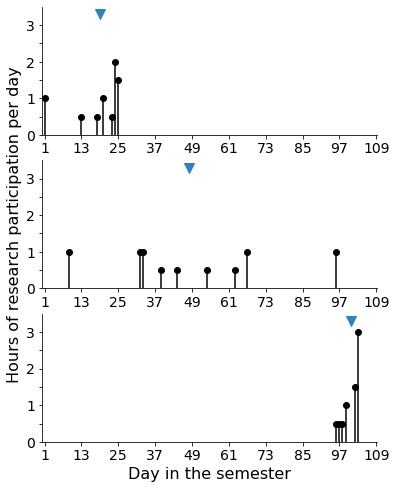

In [49]:
# least procrastinator
sorted_column = final_sample['MUCD'].sort_values()
index = sorted_column.index[0] # the subject index with the smallest MUCD 
print(index)
TimeCourse = final_sample['DeltaProgForMPCD'][index]
TimeCourse = np.array(TimeCourse)
# index 0 means day0 (did not exist in the real-world, I added because I want MUCD to represent 1st day credit*1 (1 means day1), index 1 means day 1, the 1st day of the semester
NthDay = np.nonzero(TimeCourse)[0] 
CreditList = TimeCourse[NthDay]

x = NthDay
y = CreditList

lines = []
for i in range(len(x)):
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines,colors='k')
fig, ax = plt.subplots(3,1,figsize=(6, 8))
ax[0].add_collection(linecoll)
ax[0].scatter(x,y,color='k')

MUCD = final_sample['MUCD'][index]
DayHalfPoint = final_sample['HalfwayDayofParticipation'][index]
creditlast5weeks = final_sample['creditlast5weeks'][index]
TaskCompletionDay = final_sample['TaskCompletionDay'][index]

ax[0].scatter(MUCD,3.3,marker="v",color='#3182bd',s=100)
#ax[0].scatter(DayHalfPoint,3.3,marker="v",color='#fdae6b')
#ax[0].scatter(TaskCompletionDay,3.3,marker="v",color='#fee6ce')

print('MUCD ' + str(MUCD))
print('HalfwayDayofParticipation ' + str(DayHalfPoint))
print('creditlast5weeks ' + str(creditlast5weeks))
print('task completion day ' +str(TaskCompletionDay))

ax[0].set_xticks(np.arange(1,110,12))
ax[0].set_yticks(np.arange(0,3.5,0.5))
ax[0].set_yticklabels(['0','','1','','2','','3',''])
ax[0].set_xlim([0.2,109.2])
ax[0].set_ylim([0,3.5])
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
#ax[0].set_xlabel('day of the semester')
#ax[0].set_ylabel('length of research participation (hour)')

#-------------

# around middle procrastinator 
index = 64
print(index)
TimeCourse = final_sample['DeltaProgForMPCD'][index]
TimeCourse = np.array(TimeCourse)
# index 0 means day0 (did not exist in the real-world, I added because I want MUCD to represent 1st day credit*1 (1 means day1), index 1 means day 1, the 1st day of the semester
NthDay = np.nonzero(TimeCourse)[0] 
CreditList = TimeCourse[NthDay]

x = NthDay
y = CreditList

lines = []
for i in range(len(x)):
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines,colors='k')
#fig, ax = plt.subplots()
ax[1].add_collection(linecoll)
ax[1].scatter(x,y,color='k')

MUCD = final_sample['MUCD'][index]
DayHalfPoint = final_sample['HalfwayDayofParticipation'][index]
creditlast5weeks = final_sample['creditlast5weeks'][index]
TaskCompletionDay = final_sample['TaskCompletionDay'][index]

print('MUCD ' + str(MUCD))
print('HalfwayDayofParticipation ' + str(DayHalfPoint))
print('creditlast5weeks ' + str(creditlast5weeks))
print('task completion day ' +str(TaskCompletionDay))

ax[1].scatter(MUCD,3.3,marker="v",color='#3182bd',s=100)
#ax[1].scatter(DayHalfPoint,3.3,marker="v",color='#fdae6b')
#ax[1].scatter(TaskCompletionDay,3.3,marker="v",color='#fee6ce')
print('creditlast5weeks' + str(creditlast5weeks))

ax[1].set_xticks(np.arange(1,110,12))
ax[1].set_yticks(np.arange(0,3.5,0.5))
ax[1].set_yticklabels(['0','','1','','2','','3',''])
ax[1].set_xlim([0.2,109.2])
ax[1].set_ylim([0,3.5])
ax[1].set_ylabel('Hours of research participation per day',fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

#--------------

# most procrastinator
sorted_column = final_sample['MUCD'].sort_values()
index = sorted_column.index[-1] 
print(index)
TimeCourse = final_sample['DeltaProgForMPCD'][index]
TimeCourse = np.array(TimeCourse)
# index 0 means day0 (did not exist in the real-world, I added because I want MUCD to represent 1st day credit*1 (1 means day1), index 1 means day 1, the 1st day of the semester
NthDay = np.nonzero(TimeCourse)[0] 
CreditList = TimeCourse[NthDay]

x = NthDay
y = CreditList

lines = []
for i in range(len(x)):
    pair=[(x[i],0), (x[i], y[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines,colors='k')
#fig, ax = plt.subplots()
ax[2].add_collection(linecoll)
ax[2].scatter(x,y,color='k')

MUCD = final_sample['MUCD'][index]
DayHalfPoint = final_sample['HalfwayDayofParticipation'][index]
creditlast5weeks = final_sample['creditlast5weeks'][index]
TaskCompletionDay = final_sample['TaskCompletionDay'][index]

print('MUCD ' + str(MUCD))
print('HalfwayDayofParticipation ' + str(DayHalfPoint))
print('creditlast5weeks ' + str(creditlast5weeks))
print('task completion day ' +str(TaskCompletionDay))

ax[2].scatter(MUCD,3.3,marker="v",color='#3182bd',s=100)
#ax[2].scatter(DayHalfPoint,3.3,marker="v",color='#fdae6b')
#ax[2].scatter(TaskCompletionDay,3.3,marker="v",color='#fee6ce')

print('creditlast5weeks' + str(creditlast5weeks))
#print(MPCD)
#print(DayHalfPoint)
ax[2].set_xticks(np.arange(1,110,12))
ax[2].set_yticks(np.arange(0,3.5,0.5))
ax[2].set_yticklabels(['0','','1','','2','','3',''])
ax[2].set_xlim([0.2,109.2])
ax[2].set_ylim([0,3.5])
ax[2].set_xlabel('Day in the semester',fontsize=16)
ax[2].tick_params(axis='x', labelsize=14)
ax[2].tick_params(axis='y', labelsize=14)
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

plt.show()
#fig.savefig("Paper time course of progress.pdf", transparent=True)
#fig.savefig('raw time course of progress.eps', format='eps')

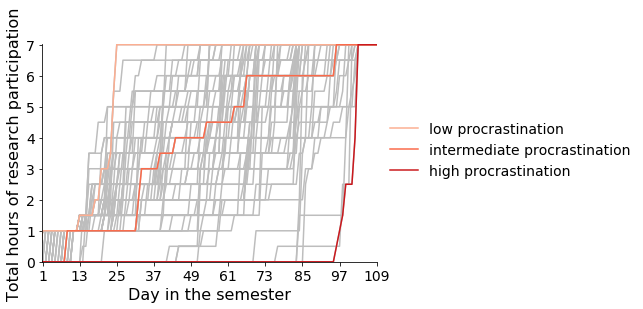

In [45]:
# plotted in examples of time course of progress, three examples, least, intermediate, most procrastinators.
fig, ax = plt.subplots()
leastproc_index = 47
intermepro_index= 64
mostpro_index = 37
for index in final_sample.index:
    ax.plot(np.cumsum(final_sample['DeltaProgForMPCD'][index]),color='#bdbdbd')

ax.plot(np.cumsum(final_sample['DeltaProgForMPCD'][leastproc_index]),color='#fcae91',label='low procrastination') 
ax.plot(np.cumsum(final_sample['DeltaProgForMPCD'][intermepro_index]),color='#fb6a4a',label='intermediate procrastination') 
ax.plot(np.cumsum(final_sample['DeltaProgForMPCD'][mostpro_index]),color='#cb181d',label='high procrastination') 
    
ax.set_xlabel('Day in the semester',fontsize=16)
ax.set_ylabel('Total hours of research participation',fontsize=16)
#plt.legend('least procrastintator','intermediate procrastinator','most procrastinator')
ax.legend(loc='best', bbox_to_anchor=(1, 0.2, 0.5, 0.5),fontsize=14,frameon=False)
#ax.legend(frameon=False)
ax.set_xticks(np.arange(1,110,12))
ax.set_xlim([0.9,109.1])
ax.set_yticks(np.arange(0,7.01,1))
ax.set_ylim([0,7.01])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("paper figure_cumulative progress.pdf", transparent=True)
plt.show()

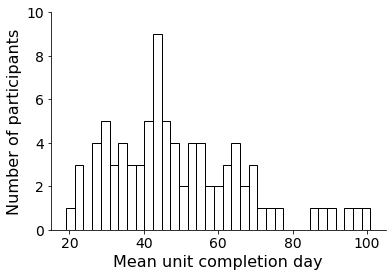

In [46]:
fig, ax = plt.subplots()
ax.hist(final_sample['MUCD'],bins=35,color='white',edgecolor = "black")
#ax[1].hist(FollowUpStudymatrixDf_removeNOFOUND_loose7Credit['HalfwayDayofParticipation'],bins=40,color='k',edgecolor = "white")
#ax[2].hist(FollowUpStudymatrixDf_removeNOFOUND_loose7Credit['TaskCompletionDay'],bins=40,color='k',edgecolor = "white")
#ax[3].hist(FollowUpStudymatrixDf_removeNOFOUND_loose7Credit['creditlast5weeks'],bins=40,color='k',edgecolor = "white")
ax.set_ylabel('Number of participants',fontsize=16)

ax.set_xlabel('Mean unit completion day',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0,2,4,6,8,10])
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)
ax.set_yticklabels(['0','2','4','6','8','10'],fontsize=14)
ax.set_xticks([20,40,60,80,100])
ax.set_xticklabels(['20','40','60','80','100'],fontsize=14)

#plt.savefig("paper histogram of MUCD.pdf", transparent=True)
plt.show()

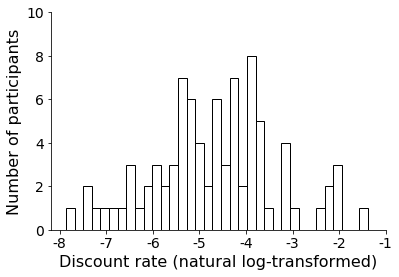

In [47]:
fig, ax = plt.subplots()
ax.hist(final_sample['DiscountRate_lnk'],bins=35,color='white',edgecolor = "black")
ax.set_ylabel('Number of participants',fontsize=16)

#ax.set_xlabel('Discount rate $\ln(k)$',fontsize=16)
ax.set_xlabel('Discount rate (natural log-transformed)',fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0,2,4,6,8,10])
#ax.tick_params(axis='x', labelsize=14)
#ax.tick_params(axis='y', labelsize=14)
ax.set_yticklabels(['0','2','4','6','8','10'],fontsize=14)
ax.set_xticks([-8,-7,-6,-5,-4,-3,-2,-1])
ax.set_xticklabels(['-8','-7','-6','-5','-4','-3','-2','-1'],fontsize=14)

#plt.savefig("paper histogram of discount rate.pdf", transparent=True)
plt.show()


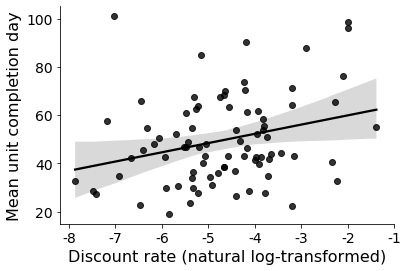

In [48]:
fig, ax = plt.subplots()
fontsizeN = 14 # for ticklables
sns.regplot(ax=ax,x="DiscountRate_lnk", y="MUCD", data=final_sample, color='k');
ax.set_xlabel('Discount rate (natural log-transformed)',fontsize=16)
ax.set_ylabel('Mean unit completion day',fontsize=16)
ax.set_yticks([20,40,60,80,100])
ax.set_yticklabels(['20','40','60','80','100'],fontsize=fontsizeN)
ax.set_xticks([-8,-7,-6,-5,-4,-3,-2,-1])
ax.set_xticklabels(['-8','-7','-6','-5','-4','-3','-2','-1'],fontsize=fontsizeN)
#ax[0].text(-8,90,'r=0.282',fontsize=14)
#ax[0].text(-8,82,'p=0.009',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig("paper correlation.pdf", transparent=True)
plt.show()